In [2]:
# Creat a .csv file for Analysation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
warnings.simplefilter("ignore")
df=pd.read_csv('uzairk.csv')  #Importing or reading .csv file

In [2]:
print(df.head)

<bound method NDFrame.head of             Index     id  fan_id             datetime  temperature  humidity  \
0             0.0  38065     175  2020-11-10 11:42:50         25.0      48.0   
1             1.0  38065     175  2020-11-10 11:42:51         25.0      48.0   
2             1.0  38065     175  2020-11-10 11:43:51         25.0      48.0   
3             1.0  38065     175  2020-11-10 11:44:51         25.0      48.0   
4             1.0  38065     175  2020-11-10 11:45:51         25.0      48.0   
...           ...    ...     ...                  ...          ...       ...   
1938992  247026.0  40436     175  2024-08-07 08:50:04         34.0      75.0   
1938993  247027.0  40436     175  2024-08-07 08:51:06         33.0      74.0   
1938994  247028.0  40436     175  2024-08-07 08:52:08         34.0      74.0   
1938995  247029.0  40436     175  2024-08-07 08:52:39         33.0      74.0   
1938996  247030.0  40436     175  2024-08-07 08:53:41         34.0      74.0   

         

In [5]:
df['speed'].value_counts()

speed
0    876336
5    641922
1    144191
4    126651
2     78888
3     71009
Name: count, dtype: int64

In [3]:
# we want temperature as independent or Predictor & speed as dependent or Predict
x = df[['temperature','humidity']] #feature/predictor
y = df['speed'] #target/predict
# Checking any missing value in data
print(df.isnull().sum())
# If x is a single column, convert it to DataFrame
if isinstance(x, pd.Series):
    x = x.to_frame()
# Standardize the features/independent/predictor
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Index            0
id               0
fan_id           0
datetime         0
temperature      0
humidity         0
mode             0
speed            0
opTime           0
eSpent           0
eSaved           0
timestampReal    0
dtype: int64


In [4]:
# Splitting data into training and testing sets like 30% data for training and 70% data for testing...
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

Training Time (Random Forest): 223.0806 seconds
Prediction Time (Random Forest): 11.0592 seconds
Accuracy (Random Forest): 0.69
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.75      0.73      0.74    262844
           1       0.50      0.18      0.26     42958
           2       0.38      0.18      0.24     23619
           3       0.36      0.04      0.07     21288
           4       0.37      0.45      0.40     38188
           5       0.70      0.91      0.79    192803

    accuracy                           0.69    581700
   macro avg       0.51      0.42      0.42    581700
weighted avg       0.66      0.69      0.66    581700



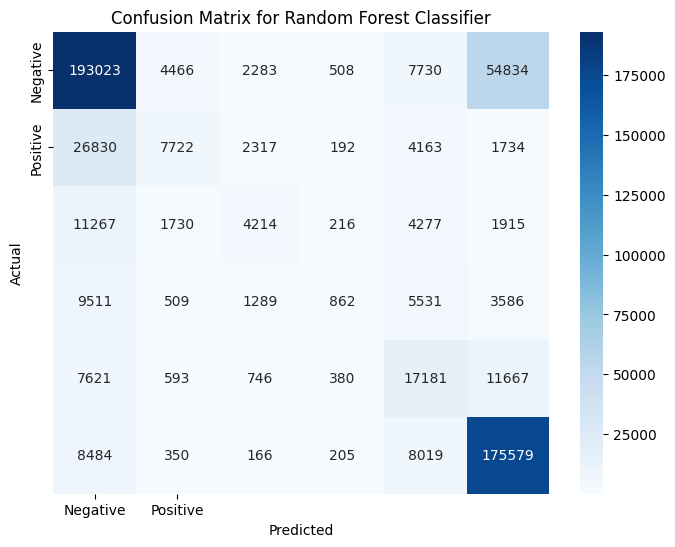

In [17]:
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

# Measure the training time
start_time = time.time()
rf_model.fit(X_train, y_train)  # Train the classifier with the training data
training_time = time.time() - start_time  # Measure the training time
print(f"Training Time (Random Forest): {training_time:.4f} seconds")

# Predicting the target values for the test set
start_time = time.time()
y_pred_rf = rf_model.predict(X_test)  # Predict the target values for the test set
prediction_time = time.time() - start_time  # Measure the prediction time
print(f"Prediction Time (Random Forest): {prediction_time:.4f} seconds")

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)  # Calculate the accuracy of the predictions
print(f'Accuracy (Random Forest): {accuracy:.2f}')

# Generate the classification report
class_report = classification_report(y_test, y_pred_rf)  # Generate the classification report
print('Classification Report (Random Forest):')
print(class_report)

# Generating confusion matrix for Visualization
conf_matrix = confusion_matrix(y_test, y_pred_rf)  # Generation of confusion matrix
plt.figure(figsize=(8, 6))  # Selecting figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


Training Time (Gradient Boosting): 697.0433 seconds
Prediction Time (Gradient Boosting): 8.1245 seconds
Accuracy (Gradient Boosting): 0.68
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.73      0.74      0.73    262844
           1       0.60      0.04      0.08     42958
           2       0.35      0.17      0.23     23619
           3       0.00      0.00      0.00     21288
           4       0.36      0.45      0.40     38188
           5       0.70      0.92      0.79    192803

    accuracy                           0.68    581700
   macro avg       0.46      0.39      0.37    581700
weighted avg       0.64      0.68      0.64    581700



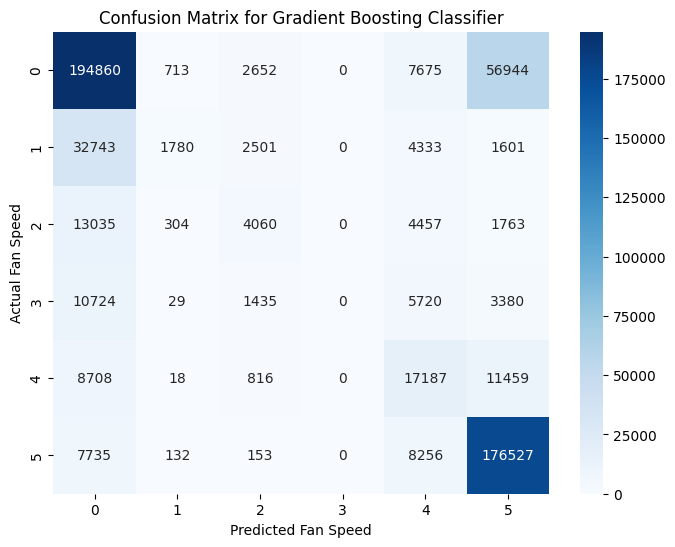

In [20]:
from sklearn.ensemble import GradientBoostingClassifier #importing gradient boosting classifier
# Initialize the Gradient Boosting Classifier for fan speed prediction
gb_model = GradientBoostingClassifier()

# Measure the training time
start_time = time.time()
gb_model.fit(X_train, y_train)  # Train the classifier with the training data (temperature & humidity)
training_time = time.time() - start_time  # Measure the training time
print(f"Training Time (Gradient Boosting): {training_time:.4f} seconds")

# Predicting the fan speed for the test set based on temperature and humidity
start_time = time.time()
y_pred_gb = gb_model.predict(X_test)  # Predict the speed for the test set
prediction_time = time.time() - start_time  # Measure the prediction time
print(f"Prediction Time (Gradient Boosting): {prediction_time:.4f} seconds")

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_gb)  # Calculate the accuracy of the predictions
print(f'Accuracy (Gradient Boosting): {accuracy:.2f}')

# Generate the classification report
class_report = classification_report(y_test, y_pred_gb)  # Generate the classification report
print('Classification Report (Gradient Boosting):')
print(class_report)

# Generating confusion matrix for Visualization
conf_matrix = confusion_matrix(y_test, y_pred_gb)  # Generation of confusion matrix
plt.figure(figsize=(8, 6))  # Selecting figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)  # Use speed classes for labels
plt.xlabel('Predicted Fan Speed')
plt.ylabel('Actual Fan Speed')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svm_model = SVC()

# Train the SVM model
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time (SVM): {training_time:.4f} seconds")

# Predict and measure prediction time
start_time = time.time()
y_pred_svm = svm_model.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time (SVM): {prediction_time:.4f} seconds")

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy:.2f}')
print('Classification Report (SVM):')
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Fan Speed')
plt.ylabel('Actual Fan Speed')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
start_time = time.time()
knn_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time (KNN): {training_time:.4f} seconds")

# Predict and measure prediction time
start_time = time.time()
y_pred_knn = knn_model.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time (KNN): {prediction_time:.4f} seconds")

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (KNN): {accuracy:.2f}')
print('Classification Report (KNN):')
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted Fan Speed')
plt.ylabel('Actual Fan Speed')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
start_time = time.time()
dt_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time (Decision Tree): {training_time:.4f} seconds")

# Predict and measure prediction time
start_time = time.time()
y_pred_dt = dt_model.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time (Decision Tree): {prediction_time:.4f} seconds")

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy (Decision Tree): {accuracy:.2f}')
print('Classification Report (Decision Tree):')
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Fan Speed')
plt.ylabel('Actual Fan Speed')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model
start_time = time.time()
lr_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time (Logistic Regression): {training_time:.4f} seconds")

# Predict and measure prediction time
start_time = time.time()
y_pred_lr = lr_model.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time (Logistic Regression): {prediction_time:.4f} seconds")

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy (Logistic Regression): {accuracy:.2f}')
print('Classification Report (Logistic Regression):')
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted Fan Speed')
plt.ylabel('Actual Fan Speed')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
start_time = time.time()
nb_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time (Naive Bayes): {training_time:.4f} seconds")

# Predict and measure prediction time
start_time = time.time()
y_pred_nb = nb_model.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time (Naive Bayes): {prediction_time:.4f} seconds")

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy (Naive Bayes): {accuracy:.2f}')
print('Classification Report (Naive Bayes):')
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Fan Speed')
plt.ylabel('Actual Fan Speed')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()
